In [2]:
#g.christoffel_symbols_display()

In [3]:
%display latex

In [4]:
M = Manifold(4, 'M')


In [5]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

### Metric tensor

In [13]:
g = M.lorentzian_metric('g')
nu = function('nu')
mu = function('mu')
R  = function('R') 
g[0,0] = -exp(2*nu(r,t))
g[1,1] = exp(2*mu(r,t))
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = -e^(2*nu(r, t)) dt*dt + e^(2*mu(r, t)) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [8]:
g.display_comp()

g_t,t = -e^(2*nu(r, t)) 
g_r,r = e^(2*mu(r, t)) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

In [9]:
g[:]

[-e^(2*nu(r, t))               0               0               0]
[              0  e^(2*mu(r, t))               0               0]
[              0               0             r^2               0]
[              0               0               0   r^2*sin(th)^2]

In [10]:
g.christoffel_symbols_display()

Gam^t_t,t = d(nu)/dt 
Gam^t_t,r = d(nu)/dr 
Gam^t_r,r = e^(2*mu(r, t) - 2*nu(r, t))*d(mu)/dt 
Gam^r_t,t = e^(-2*mu(r, t) + 2*nu(r, t))*d(nu)/dr 
Gam^r_t,r = d(mu)/dt 
Gam^r_r,r = d(mu)/dr 
Gam^r_th,th = -r*e^(-2*mu(r, t)) 
Gam^r_ph,ph = -r*e^(-2*mu(r, t))*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

## Einstein equation


In [14]:
Ric = g.ricci()
print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


In [15]:
Ric.display()

Ric(g) = -(r*e^(2*mu(r, t))*(d(mu)/dt)^2 - r*e^(2*nu(r, t))*(d(nu)/dr)^2 - r*e^(2*mu(r, t))*d(mu)/dt*d(nu)/dt + r*e^(2*mu(r, t))*d^2(mu)/dt^2 - r*e^(2*nu(r, t))*d^2(nu)/dr^2 + (r*e^(2*nu(r, t))*d(mu)/dr - 2*e^(2*nu(r, t)))*d(nu)/dr)*e^(-2*mu(r, t))/r dt*dt + 2*d(mu)/dt/r dt*dr + 2*d(mu)/dt/r dr*dt + (r*e^(2*mu(r, t))*(d(mu)/dt)^2 + r*e^(2*nu(r, t))*d(mu)/dr*d(nu)/dr - r*e^(2*nu(r, t))*d(nu)/dr^2 - r*e^(2*mu(r, t))*d(mu)/dt*d(nu)/dt + r*e^(2*mu(r, t))*d^2(mu)/dt^2 - r*e^(2*nu(r, t))*d^2(nu)/dr^2 + 2*e^(2*nu(r, t))*d(mu)/dr)*e^(-2*nu(r, t))/r dr*dr + (r*d(mu)/dr - r*d(nu)/dr + e^(2*mu(r, t)) - 1)*e^(-2*mu(r, t)) dth*dth + (r*d(mu)/dr - r*d(nu)/dr + e^(2*mu(r, t)) - 1)*e^(-2*mu(r, t))*sin(th)^2 dph*dph

In [16]:
g.ricci_scalar().display()

r(g): M --> R
   (t, r, th, ph) |--> 2*(r^2*e^(2*mu(r, t))*(d(mu)/dt)^2 - r^2*e^(2*nu(r, t))*(d(nu)/dr)^2 - r^2*e^(2*mu(r, t))*d(mu)/dt*d(nu)/dt + r^2*e^(2*mu(r, t))*d^2(mu)/dt^2 - r^2*e^(2*nu(r, t))*d^2(nu)/dr^2 + 2*r*e^(2*nu(r, t))*d(mu)/dr + (e^(2*mu(r, t)) - 1)*e^(2*nu(r, t)) + (r^2*e^(2*nu(r, t))*d(mu)/dr - 2*r*e^(2*nu(r, t)))*d(nu)/dr)*e^(-2*mu(r, t) - 2*nu(r, t))/r^2

In [17]:
g.ricci_scalar() == g.inverse()['^{ab}']*Ric['_{ab}']

True

In [18]:
G = Ric - 1/2*g.ricci_scalar() * g
G.set_name('G')
print(G)

Field of symmetric bilinear forms G on the 4-dimensional differentiable manifold M


In [19]:
G.display()

G = (2*r*e^(2*nu(r, t))*d(mu)/dr + (e^(2*mu(r, t)) - 1)*e^(2*nu(r, t)))*e^(-2*mu(r, t))/r^2 dt*dt + 2*d(mu)/dt/r dt*dr + 2*d(mu)/dt/r dr*dt + (2*r*d(nu)/dr - e^(2*mu(r, t)) + 1)/r^2 dr*dr - (r^2*e^(2*mu(r, t))*(d(mu)/dt)^2 - r^2*e^(2*nu(r, t))*(d(nu)/dr)^2 - r^2*e^(2*mu(r, t))*d(mu)/dt*d(nu)/dt + r^2*e^(2*mu(r, t))*d^2(mu)/dt^2 - r^2*e^(2*nu(r, t))*d^2(nu)/dr^2 + r*e^(2*nu(r, t))*d(mu)/dr + (r^2*e^(2*nu(r, t))*d(mu)/dr - r*e^(2*nu(r, t)))*d(nu)/dr)*e^(-2*mu(r, t) - 2*nu(r, t)) dth*dth - (r^2*e^(2*mu(r, t))*(d(mu)/dt)^2 - r^2*e^(2*nu(r, t))*(d(nu)/dr)^2 - r^2*e^(2*mu(r, t))*d(mu)/dt*d(nu)/dt + r^2*e^(2*mu(r, t))*d^2(mu)/dt^2 - r^2*e^(2*nu(r, t))*d^2(nu)/dr^2 + r*e^(2*nu(r, t))*d(mu)/dr + (r^2*e^(2*nu(r, t))*d(mu)/dr - r*e^(2*nu(r, t)))*d(nu)/dr)*e^(-2*mu(r, t) - 2*nu(r, t))*sin(th)^2 dph*dph

### The energy-momentum tensor

We consider a perfect fluid matter model. 
Let us first defined the fluid 4-velocity $u$: 

In [20]:
u = M.vector_field('u')
u[0] = exp(-nu(r))
u.display()

u = e^(-nu(r)) d/dt

In [21]:
u[:]

[e^(-nu(r)), 0, 0, 0]

In [22]:
print(u.parent())

Free module X(M) of vector fields on the 4-dimensional differentiable manifold M


Let us check that $u$ is a normalized timelike vector, i.e. that $g_{ab} u^a u^b = -1$, or, in index-free notation, $g(u,u)=-1$:

In [23]:
g(u,u)

Scalar field g(u,u) on the 4-dimensional differentiable manifold M

In [24]:
print(g(u,u))

Scalar field g(u,u) on the 4-dimensional differentiable manifold M


In [25]:
g(u,u).display()

g(u,u): M --> R
   (t, r, th, ph) |--> -e^(2*nu(r, t) - 2*nu(r))

In [26]:
g(u,u).parent()

Algebra of differentiable scalar fields on the 4-dimensional differentiable manifold M

In [27]:
print(g(u,u).parent())

Algebra of differentiable scalar fields on the 4-dimensional differentiable manifold M


In [28]:
g(u,u) == -1

False

To form the energy-momentum tensor, we need the 1-form $\underline{u}$ that is metric-dual to the vector $u$, i.e. 
$u_a = g_{ab} u^b$:

In [29]:
u_form = u.down(g)
print(u_form)

1-form on the 4-dimensional differentiable manifold M


In [30]:
u_form.display()

-e^(2*nu(r, t) - nu(r)) dt

The energy-momentum tensor is then
$$ T_{ab} = (\rho + p) u_a u_b + p \, g_{ab},$$
or in index-free notation:
$$ T = (\rho + p) \underline{u}\otimes\underline{u} + p \, g$$

Since the tensor product $\otimes$ is taken with the `*` operator, we write:

In [31]:
rho = function('rho')
p = function('p')
T = (rho(r)+p(r))* (u_form * u_form) + p(r) * g
T.set_name('T')
print(T)

Field of symmetric bilinear forms T on the 4-dimensional differentiable manifold M


In [32]:
T.display()

T = ((e^(4*nu(r, t)) - e^(2*nu(r, t) + 2*nu(r)))*p(r) + e^(4*nu(r, t))*rho(r))*e^(-2*nu(r)) dt*dt + e^(2*mu(r, t))*p(r) dr*dr + r^2*p(r) dth*dth + r^2*p(r)*sin(th)^2 dph*dph

In [33]:
T(u,u)

Scalar field T(u,u) on the 4-dimensional differentiable manifold M

In [34]:
print(T(u,u))

Scalar field T(u,u) on the 4-dimensional differentiable manifold M


In [35]:
T(u,u).display()

T(u,u): M --> R
   (t, r, th, ph) |--> ((e^(4*nu(r, t)) - e^(2*nu(r, t) + 2*nu(r)))*p(r) + e^(4*nu(r, t))*rho(r))*e^(-4*nu(r))

### The Einstein equation

The Einstein equation is 
$$ G = 8\pi T$$
We rewrite it as $E = 0$ with $E := G - 8\pi T$:

In [36]:
E = G - 8*pi*T
E.set_name('E')
print(E)

Field of symmetric bilinear forms E on the 4-dimensional differentiable manifold M


In [31]:
E.display()

E = -(8*pi*r^2*e^(2*mu(r) + 2*nu(r))*rho(r) - 2*r*e^(2*nu(r))*d(mu)/dr - (e^(2*mu(r)) - 1)*e^(2*nu(r)))*e^(-2*mu(r))/r^2 dt*dt - (8*pi*r^2*e^(2*mu(r))*p(r) - 2*r*d(nu)/dr + e^(2*mu(r)) - 1)/r^2 dr*dr - (8*pi*r^2*e^(2*mu(r))*p(r) - r^2*(d(nu)/dr)^2 - r^2*d^2(nu)/dr^2 + r*d(mu)/dr + (r^2*d(mu)/dr - r)*d(nu)/dr)*e^(-2*mu(r)) dth*dth - (8*pi*r^2*e^(2*mu(r))*p(r) - r^2*(d(nu)/dr)^2 - r^2*d^2(nu)/dr^2 + r*d(mu)/dr + (r^2*d(mu)/dr - r)*d(nu)/dr)*e^(-2*mu(r))*sin(th)^2 dph*dph

In [32]:
E.display_comp()

E_t,t = -(8*pi*r^2*e^(2*mu(r) + 2*nu(r))*rho(r) - 2*r*e^(2*nu(r))*d(mu)/dr - (e^(2*mu(r)) - 1)*e^(2*nu(r)))*e^(-2*mu(r))/r^2 
E_r,r = -(8*pi*r^2*e^(2*mu(r))*p(r) - 2*r*d(nu)/dr + e^(2*mu(r)) - 1)/r^2 
E_th,th = -(8*pi*r^2*e^(2*mu(r))*p(r) - r^2*(d(nu)/dr)^2 - r^2*d^2(nu)/dr^2 + r*d(mu)/dr + (r^2*d(mu)/dr - r)*d(nu)/dr)*e^(-2*mu(r)) 
E_ph,ph = -(8*pi*r^2*e^(2*mu(r))*p(r) - r^2*(d(nu)/dr)^2 - r^2*d^2(nu)/dr^2 + r*d(mu)/dr + (r^2*d(mu)/dr - r)*d(nu)/dr)*e^(-2*mu(r))*sin(th)^2

In [33]:
EE0_sol = solve(E[0,0].expr()==0, rho(r))
EE0_sol
EE0 = EE0_sol[0]

In [34]:
EE1_sol = solve(E[1,1].expr()==0, diff(nu(r),r))
EE1 = EE1_sol[0]
EE1

diff(nu(r), r) == 1/2*(8*pi*r^2*e^(2*mu(r))*p(r) + e^(2*mu(r)) - 1)/r

In [35]:
EE2_sol = solve(E[2,2].expr()==0, diff(mu(r),r))
EE2 = EE2_sol[0]
EE2

diff(mu(r), r) == -(8*pi*r*e^(2*mu(r))*p(r) - r*diff(nu(r), r)^2 - r*diff(nu(r), r, r) - diff(nu(r), r))/(r*diff(nu(r), r) + 1)

### The energy-momentum conservation equation
The energy-momentum tensor must obey
$$ \nabla_b T^b_{\ \, a} = 0$$
We first form the tensor $T^b_{\ \, a}$ by raising the first index of $T_{ab}$:

In [36]:
Tu = T.up(g, 0)
print(Tu)

Tensor field of type (1,1) on the 4-dimensional differentiable manifold M


We get the Levi-Civita connection $\nabla$ associated with the metric $g$:

In [37]:
nabla = g.connection()
print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional differentiable manifold M


In [38]:
#nabla.display()

We apply `nabla` to `Tu` to get the tensor $(\nabla T)^b_{\ \, ac} = \nabla_c T^b_{\ \, a}$ (MTW index convention):

In [39]:
dTu = nabla(Tu)
print(dTu)

Tensor field of type (1,2) on the 4-dimensional differentiable manifold M


The divergence $\nabla_b T^b_{\ \, a}$ is then computed as the trace of the tensor $(\nabla T)^b_{\ \, ac}$ on the first index ($b$, position `0`) and last index ($c$, position `2`):

In [40]:
divT = dTu.trace(0,2)
print(divT)

1-form on the 4-dimensional differentiable manifold M


We can also take the trace by using the index notation:

In [41]:
divT == dTu['^b_{ab}']

True

In [42]:
print(divT)

1-form on the 4-dimensional differentiable manifold M


In [43]:
divT.display()

((p(r) + rho(r))*d(nu)/dr + d(p)/dr) dr

In [44]:
divT[:]

[0, (p(r) + rho(r))*d(nu)/dr + d(p)/dr, 0, 0]

The only non trivially vanishing components is thus

In [45]:
divT[1]

(p(r) + rho(r))*d(nu)/dr + d(p)/dr

Hence the energy-momentum conservation equation $\nabla_b T^b_{\ \, a}=0$ reduces to

In [46]:
EE3_sol = solve(divT[1].expr()==0, diff(p(r),r))
EE3 = EE3_sol[0]
EE3

diff(p(r), r) == -(p(r) + rho(r))*diff(nu(r), r)

### The TOV system

Let us collect all the independent equations obtained so far:

In [47]:
for eq in [EE0, EE1, EE2, EE3]:
    show(eq)

rho(r) == 1/8*(2*r*e^(-2*mu(r))*diff(mu(r), r) - e^(-2*mu(r)) + 1)/(pi*r^2)

diff(nu(r), r) == 1/2*(8*pi*r^2*e^(2*mu(r))*p(r) + e^(2*mu(r)) - 1)/r

diff(mu(r), r) == -(8*pi*r*e^(2*mu(r))*p(r) - r*diff(nu(r), r)^2 - r*diff(nu(r), r, r) - diff(nu(r), r))/(r*diff(nu(r), r) + 1)

diff(p(r), r) == -(p(r) + rho(r))*diff(nu(r), r)

In [48]:
m = function('m')
rho1 = 1/(4*pi*r**2)*diff(m(r),r)
rho1

1/4*diff(m(r), r)/(pi*r^2)

In [49]:
EE0

rho(r) == 1/8*(2*r*e^(-2*mu(r))*diff(mu(r), r) - e^(-2*mu(r)) + 1)/(pi*r^2)

In [50]:
EE0 = EE0.subs({rho(r): rho1}).simplify_full()
EE0

1/4*diff(m(r), r)/(pi*r^2) == 1/8*(2*r*diff(mu(r), r) + e^(2*mu(r)) - 1)*e^(-2*mu(r))/(pi*r^2)

In [51]:
EE0 = (EE0*4*pi*r**2).simplify_full()
EE0

diff(m(r), r) == 1/2*(2*r*diff(mu(r), r) + e^(2*mu(r)) - 1)*e^(-2*mu(r))

In [52]:
ax = function('ax')
e = (diff(ax(r),r)+ e**(-2*mu(r))-1)*e**(2*mu(r))/(2*r)
e

1/2*(e^(-2*mu(r)) + diff(ax(r), r) - 1)*e^(2*mu(r))/r

In [53]:
EE0 = EE0.subs({diff(mu(r),r): e}).simplify_full()
EE0

diff(m(r), r) == 1/2*diff(ax(r), r)

## 2. Solving the TOV system

In order to solve the TOV system, we need to specify a fluid equation of state. For simplicity, we select a polytropic one:
$$ p = k \rho^{1+1/n}$$

In [54]:
var('k', domain='real')
var('rho_c', domain='real')
theta = function('theta')
n = 1

In [55]:
p_eos(r) = k*rho(r)**(1+1/n)

In [56]:
EE0_rho = EE0.substitute_function(p, p_eos)
EE1_rho = EE1.substitute_function(p, p_eos)
EE2_rho = EE2.substitute_function(p, p_eos)
EE3_rho = EE3.substitute_function(p, p_eos)

In [57]:
rho_eos(r) = rho_c*theta(r)**(n)

In [58]:
EE0_rho = EE0_rho.substitute_function(rho, rho_eos)
EE1_rho = EE1_rho.substitute_function(rho, rho_eos)
EE2_rho = EE2_rho.substitute_function(rho, rho_eos)
EE3_rho = EE3_rho.substitute_function(rho, rho_eos)

In [59]:
emu = -1/2*ln(1-(2*m(r)/r))
emu

-1/2*log(-2*m(r)/r + 1)

In [60]:
EE1_rho = EE1_rho.substitute_function(mu, emu)
EE1_rho

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/symbolic/expression_conversions.py:226: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  return self.composition(ex, operator)


diff(nu(r), r) == 1/2*(8*pi*k*r^2*rho_c^2*e^(-log(-2*m(r)/r + 1))*theta(r)^2 + e^(-log(-2*m(r)/r + 1)) - 1)/r

In [61]:
EE1_rho = EE1_rho.simplify_full()
EE1_rho

diff(nu(r), r) == (4*pi*k*r^3*rho_c^2*theta(r)^2 + m(r))/(r^2 - 2*r*m(r))

In [62]:
for eq in [EE1_rho, EE3_rho]:
    show(eq)

diff(nu(r), r) == (4*pi*k*r^3*rho_c^2*theta(r)^2 + m(r))/(r^2 - 2*r*m(r))

2*k*rho_c^2*theta(r)*diff(theta(r), r) == -(k*rho_c^2*theta(r)^2 + rho_c*theta(r))*diff(nu(r), r)

In [63]:
EE3_rho = EE3_rho.subs({diff(nu(r),r): EE1_rho.rhs()}).simplify_full()
EE3_rho

2*k*rho_c^2*theta(r)*diff(theta(r), r) == -(4*pi*k^2*r^3*rho_c^4*theta(r)^4 + 4*pi*k*r^3*rho_c^3*theta(r)^3 + k*rho_c^2*m(r)*theta(r)^2 + rho_c*m(r)*theta(r))/(r^2 - 2*r*m(r))

In [64]:
EE3_rho = (EE3_rho / ((n+1)*k*rho_c**(1+1/n)*theta(r)**n)).simplify_full()
EE3_rho

diff(theta(r), r) == -1/2*(4*pi*k^2*r^3*rho_c^3*theta(r)^3 + 4*pi*k*r^3*rho_c^2*theta(r)^2 + k*rho_c*m(r)*theta(r) + m(r))/((k*r^2 - 2*k*r*m(r))*rho_c)

### Numerical resolution

Let us use a standard 4th-order Runge-Kutta method:

In [268]:
desolve_system_rk4?

We gather all equations in a list for the ease of manipulation:

In [269]:
eqs = [EE0_rho, EE1_rho, EE2_rho, EE3_rho]

To get a numerical solution, we have of course to specify some numerical value for the EOS constant $k$; let us choose $k=1/4$:

In [270]:
k0 = 1/4
rhs = [eq.rhs().subs(k=k0) for eq in eqs]
rhs

[4*pi*r^2*rho(r),
 1/2*(2*pi*r^2*e^(2*mu(r))*rho(r) + e^(2*mu(r)) - 1)/r,
 1/2*(8*pi*r^2*e^(2*mu(r))*rho(r) - e^(2*mu(r)) + 1)/r,
 -5/4*(2*pi*r^2*e^(2*mu(r))*rho(r) + e^(2*mu(r)) - 1)/r]

In [271]:
rhs[0] = rhs[0] * unit_step(rho(r))
rhs[2] = rhs[2] * unit_step(rho(r))
rhs[3] = rhs[3] * unit_step(rho(r))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)),
 1/2*(2*pi*r^2*e^(2*mu(r))*rho(r) + e^(2*mu(r)) - 1)/r,
 1/2*(8*pi*r^2*e^(2*mu(r))*rho(r) - e^(2*mu(r)) + 1)*unit_step(rho(r))/r,
 -5/4*(2*pi*r^2*e^(2*mu(r))*rho(r) + e^(2*mu(r)) - 1)*unit_step(rho(r))/r]

In [272]:
rhs.append(1 * unit_step(rho(r)))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)),
 1/2*(2*pi*r^2*e^(2*mu(r))*rho(r) + e^(2*mu(r)) - 1)/r,
 1/2*(8*pi*r^2*e^(2*mu(r))*rho(r) - e^(2*mu(r)) + 1)*unit_step(rho(r))/r,
 -5/4*(2*pi*r^2*e^(2*mu(r))*rho(r) + e^(2*mu(r)) - 1)*unit_step(rho(r))/r,
 unit_step(rho(r))]

In [273]:
var('m_1 nu_1 mu_1 rho_1 r_1')
rhs = [y.subs({m(r): m_1, nu(r): nu_1, mu(r): mu_1, rho(r): rho_1}) for y in rhs]
rhs

[4*pi*r^2*rho_1*unit_step(rho_1),
 1/2*(2*pi*r^2*rho_1*e^(2*mu_1) + e^(2*mu_1) - 1)/r,
 1/2*(8*pi*r^2*rho_1*e^(2*mu_1) - e^(2*mu_1) + 1)*unit_step(rho_1)/r,
 -5/4*(2*pi*r^2*rho_1*e^(2*mu_1) + e^(2*mu_1) - 1)*unit_step(rho_1)/r,
 unit_step(rho_1)]

The integration parameters:

In [274]:
rho_c = 1
r_min = 1e-8
r_max = 1
np = 200
delta_r = (r_max - r_min) / (np-1)

In [275]:
sol = desolve_system_rk4(rhs, vars=(m_1, nu_1, mu_1, rho_1, r_1), ivar=r, 
                         ics=[r_min, 0, 0, 0, rho_c, r_min], 
                         end_points=r_max, step=delta_r)

The solution is returned as a list, the first 10 elements of which being:

In [276]:
sol[:20]

[[1.00000000000000e-8, 0, 0, 0, 1, 1.00000000000000e-8],
 [0.00502513557788945,
  5.31396741550669e-07,
  9.25532372054304e-05,
  0.000105749840690458,
  0.9997686169069864,
  0.005025135577889449],
 [0.0100502611557789,
  4.24980303772615e-06,
  0.000370224361934933,
  0.000423027295020575,
  0.9990744390951626,
  0.0100502611557789],
 [0.01507538673366835,
  1.43333190735812e-05,
  0.000833083042424976,
  0.000951675756088545,
  0.9979172923939374,
  0.01507538673366835],
 [0.0201005123115578,
  3.39423464338861e-05,
  0.001481215890995345,
  0.00169148380781732,
  0.9962969602725116,
  0.0201005123115578],
 [0.02512563788944725,
  6.62107015612164e-05,
  0.00231474617359045,
  0.002642148938139912,
  0.9942131345660238,
  0.02512563788944725],
 [0.0301507634673367,
  0.000114236732548861,
  0.003333829871080111,
  0.003803274324071593,
  0.9916654253222996,
  0.0301507634673367],
 [0.03517588904522615,
  0.000181074420824379,
  0.004538652717457708,
  0.005174363425234091,
  0.9886533682063556,
  0.03517588904522614],
 [0.0402010146231156,
  0.000269724463855163,
  0.005929426889471464,
  0.006754813121199269,
  0.9851764327763213,
  0.04020101462311559],
 [0.04522614020100505,
  0.000383125336337687,
  0.007506387121545179,
  0.008543905470697742,
  0.981234032196137,
  0.04522614020100504],
 [0.0502512657788945,
  0.000524144328242327,
  0.009269786165698922,
  0.01054079807953191,
  0.9768255345857527,
  0.05025126577889449],
 [0.05527639135678395,
  0.000695568559082542,
  0.0112198895437878,
  0.0127445130412501,
  0.9719502761405305,
  0.05527639135678394],
 [0.0603015169346734,
  0.000900095968933555,
  0.01335696954360589,
  0.01515392440559094,
  0.9666075761409854,
  0.06030151693467339],
 [0.06532664251256284,
  0.001140326288067823,
  0.01568129840861148,
  0.01776774412480066,
  0.9607967539784714,
  0.06532664251256284],
 [0.0703517680904523,
  0.001418751988621439,
  0.01819314066746262,
  0.02058450642505146,
  0.9545171483313436,
  0.0703517680904523],
 [0.07537689366834174,
  0.001737749223476009,
  0.02089274454551087,
  0.02360255054891584,
  0.947768138636223,
  0.07537689366834174],
 [0.0804020192462312,
  0.002099568759553928,
  0.02378033239639703,
  0.02682000181523224,
  0.9405491690090076,
  0.0804020192462312],
 [0.08542714482412064,
  0.002506326915002085,
  0.02685609008820151,
  0.03023475094496551,
  0.9328597747794964,
  0.08542714482412064],
 [0.0904522704020101,
  0.002959996512301069,
  0.03012015527543681,
  0.03384443160615494,
  0.9246996118114081,
  0.0904522704020101],
 [0.09547739597989954,
  0.003462397862206089,
  0.03357260448573991,
  0.03764639613815692,
  0.9160684887856504,
  0.09547739597989954]]

In [277]:
rho_sol = [(s[0], s[4]) for s in sol]
rho_sol[:10]

[(1.00000000000000e-8, 1),
 (0.00502513557788945, 0.9997686169069864),
 (0.0100502611557789, 0.9990744390951626),
 (0.01507538673366835, 0.9979172923939374),
 (0.0201005123115578, 0.9962969602725116),
 (0.02512563788944725, 0.9942131345660238),
 (0.0301507634673367, 0.9916654253222996),
 (0.03517588904522615, 0.9886533682063556),
 (0.0402010146231156, 0.9851764327763213),
 (0.04522614020100505, 0.981234032196137)]

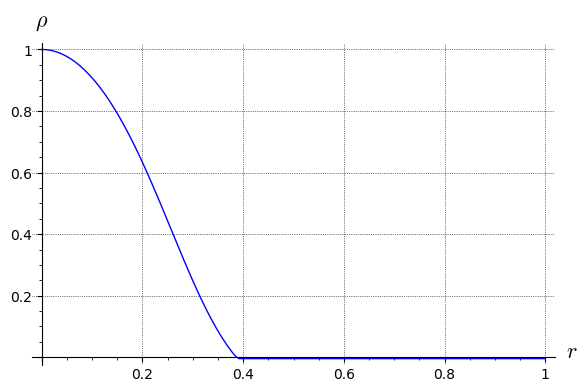

In [278]:
graph = line(rho_sol, axes_labels=[r'$r$', r'$\rho$'], gridlines=True)
graph

The solution for $m(r)$:

In [279]:
m_sol = [(s[0], s[1]) for s in sol]
m_sol[:10]

[(1.00000000000000e-8, 0),
 (0.00502513557788945, 5.31396741550669e-07),
 (0.0100502611557789, 4.24980303772615e-06),
 (0.01507538673366835, 1.43333190735812e-05),
 (0.0201005123115578, 3.39423464338861e-05),
 (0.02512563788944725, 6.62107015612164e-05),
 (0.0301507634673367, 0.000114236732548861),
 (0.03517588904522615, 0.000181074420824379),
 (0.0402010146231156, 0.000269724463855163),
 (0.04522614020100505, 0.000383125336337687)]

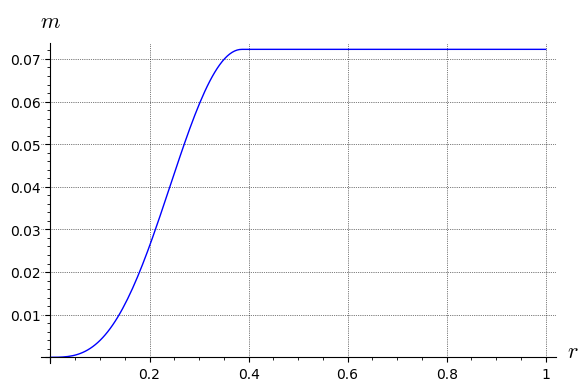

In [280]:
graph = line(m_sol, axes_labels=[r'$r$', r'$m$'], gridlines=True)
graph

The solution for $\nu(r)$ (has to be rescaled by adding a constant to ensure $\nu(+\infty) = 1$):

In [281]:
mu_sol = [(s[0], s[2]) for s in sol]
mu_sol[:10]

[(1.00000000000000e-8, 0),
 (0.00502513557788945, 9.25532372054304e-05),
 (0.0100502611557789, 0.000370224361934933),
 (0.01507538673366835, 0.000833083042424976),
 (0.0201005123115578, 0.001481215890995345),
 (0.02512563788944725, 0.00231474617359045),
 (0.0301507634673367, 0.003333829871080111),
 (0.03517588904522615, 0.004538652717457708),
 (0.0402010146231156, 0.005929426889471464),
 (0.04522614020100505, 0.007506387121545179)]

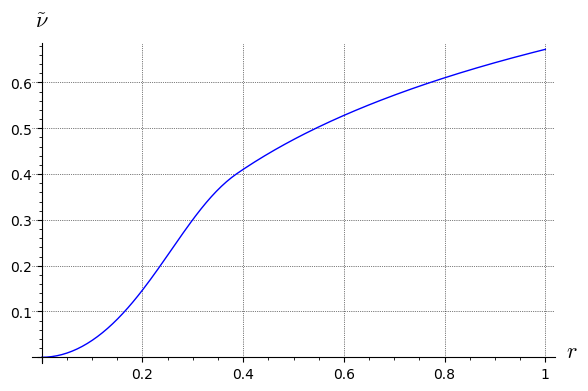

In [282]:
graph = line(mu_sol, axes_labels=[r'$r$', r'$\tilde{\nu}$'], gridlines=True)
graph

In [283]:
mu_sol = [(s[0], s[3]) for s in sol]
mu_sol[:10]

[(1.00000000000000e-8, 0),
 (0.00502513557788945, 0.000105749840690458),
 (0.0100502611557789, 0.000423027295020575),
 (0.01507538673366835, 0.000951675756088545),
 (0.0201005123115578, 0.00169148380781732),
 (0.02512563788944725, 0.002642148938139912),
 (0.0301507634673367, 0.003803274324071593),
 (0.03517588904522615, 0.005174363425234091),
 (0.0402010146231156, 0.006754813121199269),
 (0.04522614020100505, 0.008543905470697742)]

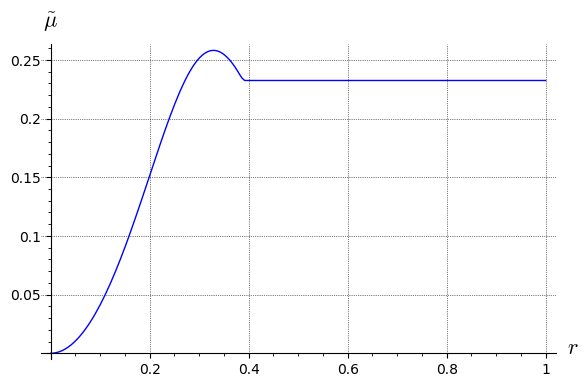

In [284]:
graph = line(mu_sol, axes_labels=[r'$r$', r'$\tilde{\mu}$'], gridlines=True)
graph

The solution for $R(r)$:

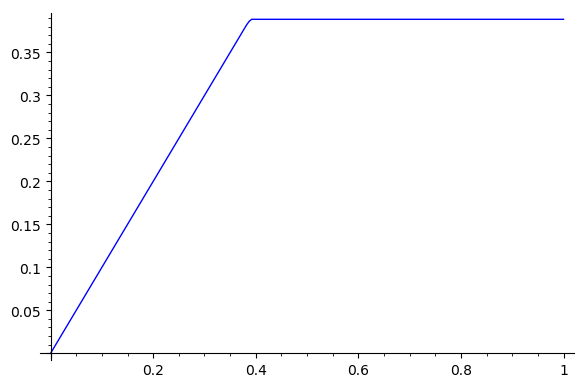

In [285]:
r_sol = [(s[0], s[5]) for s in sol]
line(r_sol)

The total gravitational mass of the star is obtained via the last element (index: `-1`) of the list of $(r,m(r))$ values:

In [286]:
M_grav = m_sol[-1][1]
M_grav

0.07224954702081957

Similarly, the stellar radius is obtained through the last element of the list of $(r,R(r))$ values:

In [287]:
R = r_sol[-1][1]
R

0.3886097213567834

The star's compactness:

In [288]:
M_grav/R

0.18591801246908876

### Sequence of stellar models

Let us perform a loop on the central density.
First we set up a list of values for $\rho_c$:

In [289]:
rho_c_min = 0.01
rho_c_max = 3
n_conf = 40
rho_c_list = [rho_c_min + i * (rho_c_max-rho_c_min)/(n_conf-1) for i in range(n_conf)]
rho_c_list

[0.0100000000000000,
 0.0866666666666667,
 0.163333333333333,
 0.240000000000000,
 0.316666666666667,
 0.393333333333333,
 0.470000000000000,
 0.546666666666667,
 0.623333333333333,
 0.700000000000000,
 0.776666666666667,
 0.853333333333333,
 0.930000000000000,
 1.00666666666667,
 1.08333333333333,
 1.16000000000000,
 1.23666666666667,
 1.31333333333333,
 1.39000000000000,
 1.46666666666667,
 1.54333333333333,
 1.62000000000000,
 1.69666666666667,
 1.77333333333333,
 1.85000000000000,
 1.92666666666667,
 2.00333333333333,
 2.08000000000000,
 2.15666666666667,
 2.23333333333333,
 2.31000000000000,
 2.38666666666667,
 2.46333333333333,
 2.54000000000000,
 2.61666666666667,
 2.69333333333333,
 2.77000000000000,
 2.84666666666667,
 2.92333333333333,
 3.00000000000000]

The loop:

In [298]:
M_list = list()
R_list = list()
for rho_c in rho_c_list:
    sol = desolve_system_rk4(rhs, vars=(m_1, nu_1, mu_1, rho_1, r_1), ivar=r, 
                         ics=[r_min, 0, 0, 0, rho_c, r_min], 
                         end_points=r_max, step=delta_r)
    M_list.append( sol[-1][1] )
    R_list.append( sol[-1][5] )

The mass along the sequence:

In [299]:
M_list

[0.001189886676025332,
 0.009897061310683802,
 0.01790582778207476,
 0.02527321495410726,
 0.03204471174560651,
 0.03826000392018375,
 0.04397232769679389,
 0.04920438475078927,
 0.05400982114732816,
 0.0583976386729527,
 0.06241759669608337,
 0.06610035179084067,
 0.06944599607893454,
 0.07250170888543088,
 0.07527895070090417,
 0.07782009542452883,
 0.0801072307912774,
 0.08217401943637415,
 0.08404917418765533,
 0.08572826846893149,
 0.08723479839158123,
 0.08858382019731129,
 0.08978461382647118,
 0.09084868873653265,
 0.09178891379655392,
 0.09261292957917502,
 0.09331541545923726,
 0.09393309256482386,
 0.09445649341589175,
 0.09489071203481585,
 0.09521511059884537,
 0.0954977575311802,
 0.09570944480845721,
 0.09587345768232286,
 0.09593232896613448,
 0.09597698382016535,
 0.09597386419498914,
 0.09593458619772369,
 0.09580536948870598,
 0.0956747617270982]

The radius along the sequence:

In [300]:
R_list

[0.4849246282663306,
 0.4748743771105518,
 0.4664991678140694,
 0.4589614794472353,
 0.4497487492211047,
 0.4413735399246223,
 0.4346733724874364,
 0.426298163190954,
 0.4195979957537682,
 0.4145728701758787,
 0.4061976608793963,
 0.3994974934422105,
 0.394472367864321,
 0.3860971585678387,
 0.3810720329899492,
 0.3743718655527634,
 0.3693467399748739,
 0.3643216143969845,
 0.3584589678894469,
 0.3534338423115574,
 0.348408716733668,
 0.3408710283668339,
 0.3358459027889444,
 0.3333333399999998,
 0.3283082144221103,
 0.3232830888442209,
 0.3190954841959797,
 0.3140703586180903,
 0.3090452330402009,
 0.3040201074623115,
 0.3006700237437185,
 0.2981574609547738,
 0.2939698563065326,
 0.2889447307286432,
 0.2855946470100502,
 0.2805695214321608,
 0.2788944795728643,
 0.2738693539949749,
 0.270519270276382,
 0.2688442284170855]

To draw $M$ as a function of $\rho_{\rm c}$, we use the Python function `zip` to construct a list of $(\rho_{\rm c}, M)$ values:

In [301]:
zip(rho_c_list, M_list)

[(0.0100000000000000, 0.001189886676025332),
 (0.0866666666666667, 0.009897061310683802),
 (0.163333333333333, 0.01790582778207476),
 (0.240000000000000, 0.02527321495410726),
 (0.316666666666667, 0.03204471174560651),
 (0.393333333333333, 0.03826000392018375),
 (0.470000000000000, 0.04397232769679389),
 (0.546666666666667, 0.04920438475078927),
 (0.623333333333333, 0.05400982114732816),
 (0.700000000000000, 0.0583976386729527),
 (0.776666666666667, 0.06241759669608337),
 (0.853333333333333, 0.06610035179084067),
 (0.930000000000000, 0.06944599607893454),
 (1.00666666666667, 0.07250170888543088),
 (1.08333333333333, 0.07527895070090417),
 (1.16000000000000, 0.07782009542452883),
 (1.23666666666667, 0.0801072307912774),
 (1.31333333333333, 0.08217401943637415),
 (1.39000000000000, 0.08404917418765533),
 (1.46666666666667, 0.08572826846893149),
 (1.54333333333333, 0.08723479839158123),
 (1.62000000000000, 0.08858382019731129),
 (1.69666666666667, 0.08978461382647118),
 (1.77333333333333, 0.09084868873653265),
 (1.85000000000000, 0.09178891379655392),
 (1.92666666666667, 0.09261292957917502),
 (2.00333333333333, 0.09331541545923726),
 (2.08000000000000, 0.09393309256482386),
 (2.15666666666667, 0.09445649341589175),
 (2.23333333333333, 0.09489071203481585),
 (2.31000000000000, 0.09521511059884537),
 (2.38666666666667, 0.0954977575311802),
 (2.46333333333333, 0.09570944480845721),
 (2.54000000000000, 0.09587345768232286),
 (2.61666666666667, 0.09593232896613448),
 (2.69333333333333, 0.09597698382016535),
 (2.77000000000000, 0.09597386419498914),
 (2.84666666666667, 0.09593458619772369),
 (2.92333333333333, 0.09580536948870598),
 (3.00000000000000, 0.0956747617270982)]

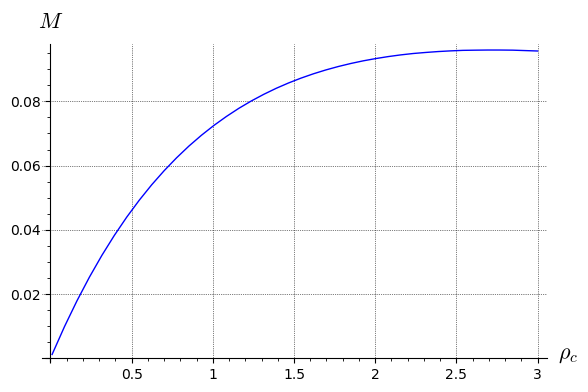

In [302]:
graph = line(zip(rho_c_list, M_list), axes_labels=[r'$\rho_c$', r'$M$'], gridlines=True)
graph

Similarly, we draw $M$ as a function of $R$:

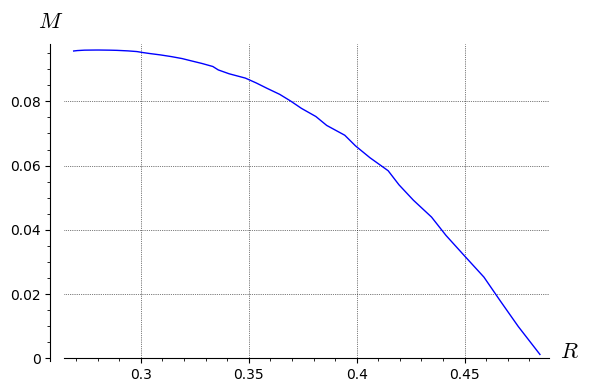

In [303]:
graph = line(zip(R_list, M_list), axes_labels=[r'$R$', r'$M$'], gridlines=True)
graph

and we save the plot in a pdf file to use it in our next publication ;-)

In [125]:
graph.save('plot_M_R.pdf')